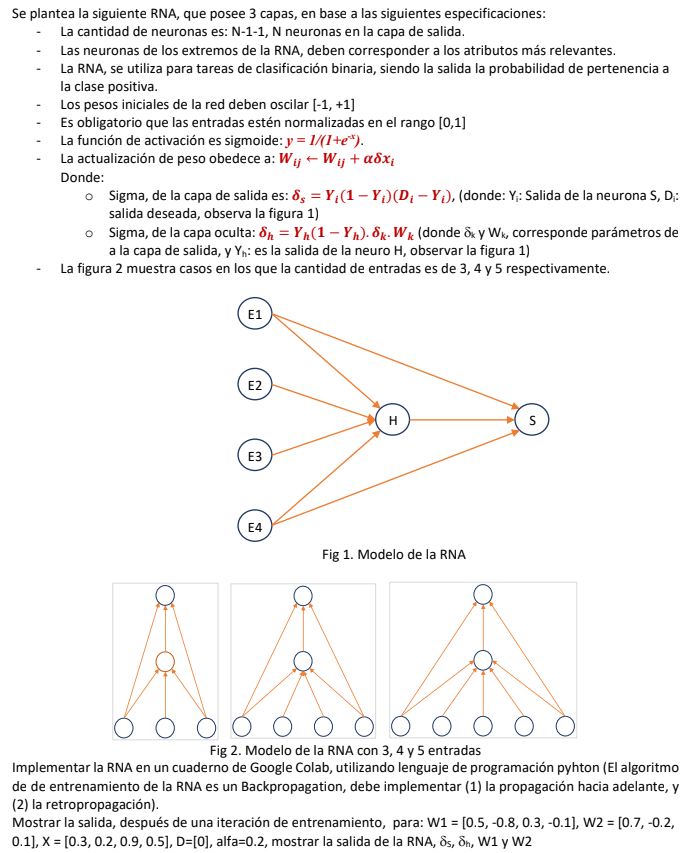

# RNA MULTICAPA DE 3 CAPAS
 - capa de entrada(N)
 - 1 capa oculta(M)
 - capa de salida(O)

## importar librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

## funcion de activacion

In [ ]:
def func_activacion(n):
  return 1/(1+math.exp(-n))   

In [ ]:
func_activacion_vect = np.vectorize(func_activacion)

## RNA

In [ ]:
def neurona(pesos,entrada):
  prod_punto = np.dot(pesos,entrada) # z = W.X
  return func_activacion_vect(prod_punto) # f(z)

## RNA Multicapa

In [ ]:
def red_neuronal_multicapa(input, pesosc1, pesoscs):
  # Capa entrada 
  entrada_x = np.array([input]).reshape(-1,1)
  # Capa oculta 1
  salida_c1 = neurona(pesosc1, entrada_x)
  # Capa de SALIDA
  # entrayendo la 1ra y ultima entrada
  Xi = input[0]
  Xf = input[-1]
  # valor de la capa de salida de la c1
  Xm = salida_c1[0]
  # construyendo la el nuevo vector de entrada para la capa de salida
  salida_combinada_ce_c1 = np.array([Xi,Xm,Xf]).reshape(-1,1)
  # obteniendo resultado capa de salida
  output_cs = neurona(pesoscs, salida_combinada_ce_c1)
  # Retornar resultados  
  return salida_combinada_ce_c1, output_cs

## derivada de la funcion

In [ ]:
def derivada_f(salida_y): # derivada de la funcion sigmoide
  return salida_y*(1-salida_y)

## backpropagation

In [ ]:
def propagacion_hacia_atras(entradas,salidas_deseadas,alfa,neuronas_c1,neuronas_cs, epocas):
  # longitud de la entrada(caracteristicas)
  inputs = [entradas]
  n_entradas = len(inputs[0]) # filas: nro neuronas x capa, col = nro inputs que recibe la neurona
  # PESOS DE LAS CAPAS
  # Capa oculta 1
  pesosc1 =  np.array([0.5, -0.8, 0.3, -0.1])   
  # Capa de salida
  pesoscs = np.array([0.7, -0.2, 0.1]) 

  # Iterar el algoritmo(nro de epocas)
  for epoch in range(0,epocas):
    for entrada_i, salida_deseada_i in zip(entradas,salidas_deseadas): # extraer cada entrada y salida correspondiente
      salida_c1, output_cs = red_neuronal_multicapa(entrada_i, pesosc1, pesoscs)
      # ----------------------------------------------------------------------------------------------------
      # Calcular los errores producidos en cada capa de forma invertida(retropropagacion) y actualizar pesos
      # ----------------------------------------------------------------------------------------------------
      # Calcular Δ para la CAPA de SALIDA(cs): Yi(1 − Yi)(Di − Yi)
      delta_cs = derivada_f(output_cs)*(salida_deseada_i - output_cs)
      peso_anterior_cs = pesoscs
      # Actualizar pesos que llegan a la capa de SALIDA
      pesoscs = pesoscs + alfa * delta_cs.reshape(1,-1).T * salida_c1.reshape(1,-1) 
      # Calcular Δ para la CAPA OCULTA 1 (pesosc1): 
      # extrayendo el delta intermedio
      delta_c1 = derivada_f(salida_c1[1]) * np.dot(peso_anterior_cs[1], delta_cs[0])  
      # Actualizar pesos  que entran a las neuronas de la capa oculta 1
      pesosc1 = pesosc1 + alfa * delta_c1*entrada_i
  #return pesosc1,pesoscs 
  return output_cs,delta_cs,delta_c1,pesosc1,pesoscs

In [ ]:
entradas = [[0.3, 0.2, 0.9, 0.5]]
salidas = [[0]]
alfa = 0.2
epocas = 1
neuronas_c1 = 1
neuronas_cs = 1

In [ ]:
# ================ USO DEL MODELO =================
# APLICANDO BACKPROPAGATION
W1 = np.array([ 0.50039636, -0.79973576,  0.30118907, -0.09933941])
W2 = np.array([ 0.69198516, -0.21475553,  0.08664194])
# PREDICIENDO
salida_capa_combinada, salida_capa_final = red_neuronal_multicapa(X,W1,W2)
print("salida capa intermedia", salida_capa_combinada)
print("RESULTADO salida final", salida_capa_final)

salida capa intermedia [[0.3       ]
 [0.55269663]
 [0.5       ]]
RESULTADO salida final [0.53300739]


In [ ]:
#Mostrando resultados
SALIDA_RNA,DELTA_CS,DELTA_C1,peso_capa_intermedia, peso_capa_final = propagacion_hacia_atras(entradas,salidas,alfa,neuronas_c1,neuronas_cs,epocas)
print("SALIDA_RNA",SALIDA_RNA,"\n")
print("DELTA_CS",DELTA_CS,"\n")
print("DELTA_C1",DELTA_C1,"\n")
print("peso capa oculta 1 W1",peso_capa_intermedia,"\n")
print("peso capa final W2",peso_capa_final,"\n")

SALIDA_RNA [0.53731509] 

DELTA_CS [-0.13358061] 

DELTA_C1 [0.00660593] 

peso capa oculta 1 W1 [ 0.50039636 -0.79973576  0.30118907 -0.09933941] 

peso capa final W2 [[ 0.69198516 -0.21475553  0.08664194]] 

